# Mushroom Edibility Classification

**Link**

https://www.kaggle.com/uciml/mushroom-classification

**Context**

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

**Content**

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified through the target attribute `class` as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

The dataset consists of the following attributes:
- class - edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

**Task (Classification)**

Your task is to use the present data set to predict the edibility of a mushroom sample. To do this, use the `Logistic Regression` and `XGBoost` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

**ML Project Checklist**
1. Frame the problem and look at the big picture. 
2. Get the data. 
3. Explore the data to gain insights. 
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms. 
5. Explore many different models and short-list the best ones. 
6. Fine-tune your models and combine them into a great solution. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.

# 1. Framing the problem

The primary objective of this project is to estimate the probability that a given mushroom sample is edible, based on various features such as gill size, cap color, and other morphological characteristics. The resulting machine learning models could potentially be integrated into a broader "mushroom guidance" application. In such an app, users could take a photo of a mushroom, and the system would provide an initial estimate of its edibility. This approach frames the problem as a supervised learning classification task, where performance can be measured using metrics such as accuracy, precision, and recall. Given the real-world risk of misclassification, particular attention must be paid to minimizing false positives (i.e., predicting a poisonous mushroom as edible). While a reliable system would need to exceed a defined accuracy threshold to be considered practical, the aim of this project is to assess feasibility.
Nonetheless, real-life expertise should not be disregarded. The application could also support experts by providing a second opinion, comparable to how machine learning assists doctors with diagnostics in fields like radiology. This hybrid approach (combining expert knowledge with algorithmic estimation) could lead to more robust and safer classification outcomes.

# 2. Getting the data
 
The data has been downloaded and stored in CSV format to facilitate loading and manipulation within standard data science tools such as Pandas. A copy from the original data was created to perform the following data analysis and model training steps on.

**Außerdem zu erwähnen**:
- mussten manche Daten hinzugefügt werden weil "?"- oder "NaN"-Eintrag ?
- 

In [2]:
### LIBRARIES ###

# ─── Standard ────────────────────────────────────────────────────────
import math

# ─── Data Handling ───────────────────────────────────────────────────
import pandas as pd
import numpy as np

# ─── Visualization ───────────────────────────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns   

# ─── Preprocessing & Pipeline ────────────────────────────────────────
from scipy.stats import chi2_contingency
from itertools import combinations

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler
)

# ─── Modelle & Hyperparameter-Tuning ─────────────────────────────────
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV
)

# ─── Metrics ─────────────────────────────────────────────────────────
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# ─── Encoder / Transformer ───────────────────────────────────────────
from sklearn.base import BaseEstimator, TransformerMixin
# from category_encoders import BinaryEncoder  # falls du die Bibliothek nutzt
# oder definiere hier deinen eigenen BinaryEncoder

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Load the data
df=pd.read_csv(r'data\mushrooms.csv')

# create copies of the original DataFrame
data = df.copy()

# 3. Exploring the data


The dataset, sourced from the UCI Machine Learning Repository, consists of 8,124 complete samples with no missing values. It includes 23 categorical features, each representing a specific characteristic of mushrooms, such as cap-shape, odor, veil-color, and habitat. All variables are categorical, with varying cardinality: while some, like the target variable edibility, are binary, others, such as gill-color, contain more than 10 distinct categories. 

General guidelines:
- Create a copy of the data for exploration (down sampling if necessary).
- Keep record of your data exploration (Jupyter notebook).
- Study each attribute and its characteristics: 
    Name, Type (categorical, int/float, bounded/unbounded, text, structured, etc.), % missing values, Noisiness (stochastic, outliers, rounding errors, etc.), 
    Type of distribution (Gaussian, uniform, logarithmic, etc.), Possibly useful for the task?
- For supervised learning tasks, identify the target attribute(s).
- Visualize the data. -> Scatterplot, HeatMaps etc
- Study the correlations between attributes.
- Study how you would solve the problem manually.
- Identify the promising transformations you may want to apply.
- Identify extra data that would be useful.
- Document what you have learned.

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

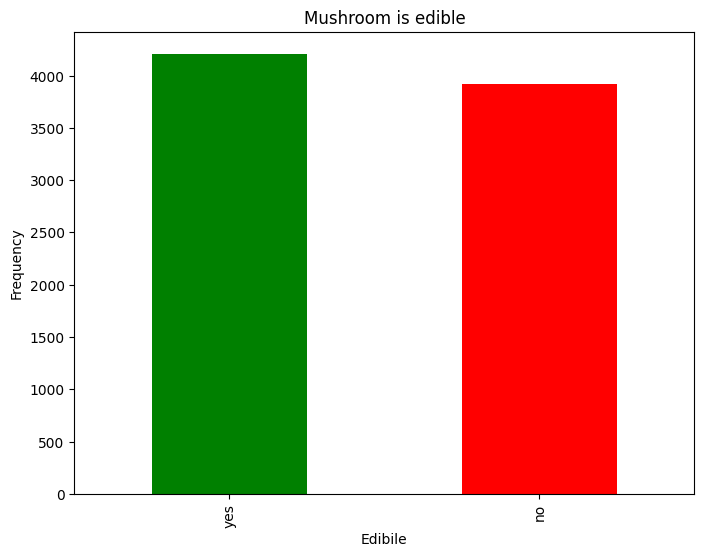

In [7]:
# Bar plot for Column 0 "edible"
df.iloc[:,0] = df.iloc[:,0].replace("e","yes") # replacing e with yes
df.iloc[:,0] = df.iloc[:,0].replace("p","no")  # replacing p with no

plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar', color=["green", "red"], label='Edible')
plt.title('Mushroom is edible')
plt.xlabel('Edibile')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def cramers_v(x, y):
    """Berechnet Cramér’s V und gibt NaN zurück, wenn eine Variable nur eine Kategorie hat."""
    ct = pd.crosstab(x, y)
    n = ct.values.sum()
    r, k = ct.shape
    if r < 2 or k < 2:
        return np.nan
    chi2 = chi2_contingency(ct, correction=False)[0]
    return np.sqrt(chi2 / (n * min(r-1, k-1)))

def get_top_features(df: pd.DataFrame, target: str, top_n: int = 5) -> list:
    """Gibt die Top-N Features zurück, die laut Cramér’s V am stärksten mit der Zielvariable korrelieren."""
    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in DataFrame.")

    scores = {
        col: cramers_v(df[col], df[target])
        for col in df.columns if col != target
    }

    filtered_scores = {k: v for k, v in scores.items() if not np.isnan(v)} # NaN-entries are filtered out

    sorted_features = sorted(filtered_scores.items(), key=lambda x: -x[1])
    top_features = [feature for feature, score in sorted_features[:top_n]]
    
    return top_features

def nominal_assoc_matrix(df: pd.DataFrame) -> pd.DataFrame:
    """
    Gibt eine symmetrische Cramér’s V-Assoziationsmatrix für alle 
    nominalen Spalten in df zurück. Spalten mit nur einer Kategorie werden mit NaN markiert.
    """
    cols = df.columns
    M = pd.DataFrame(np.eye(len(cols)), index=cols, columns=cols, dtype=float)
    
    for col1, col2 in combinations(cols, 2):
        v = cramers_v(df[col1], df[col2])
        M.loc[col1, col2] = M.loc[col2, col1] = v
    
    return M

V_matrix = nominal_assoc_matrix(df)
print(V_matrix)

top_features = get_top_features(df, target='class', top_n=5)
print("\nTop 5 Features according to Cramér's V:", top_features)

                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.245571     0.196925   0.218427   
cap-shape                 0.245571   1.000000     0.203721   0.171431   
cap-surface               0.196925   0.203721     1.000000   0.225273   
cap-color                 0.218427   0.171431     0.225273   1.000000   
bruises                   0.501530   0.255606     0.134377   0.217648   
odor                      0.971005   0.245516     0.238446   0.332026   
gill-attachment           0.129200   0.154978     0.210841   0.247965   
gill-spacing              0.348387   0.081702     0.338222   0.399956   
gill-size                 0.540024   0.346823     0.277414   0.470307   
gill-color                0.680830   0.235100     0.257618   0.282430   
stalk-shape               0.102019   0.307104     0.078770   0.595394   
stalk-root                0.406805   0.360155     0.314652   0.385320   
stalk-surface-above-ring  0.587944   0.160055     0

# 4. Preparing the data

Missing entries, represented by "?" were removed from the dataset.

Afterwards the **categorical** feature values were mapped to numerical codes usind an Encoder. This transformation is necessary because numerical input rather than categorical strings are required.
**One-Hot Encoding** is chosen over alternatives such as Label Encoding because it avoids introducing artificial ordinal relationships between categories and is suitable for our selected models (linear and tree-based).

Since our dataset contains only categorical features (which are one-hot encoded), feature scaling is not necessary.

In [ ]:
# Clean & prepare functions
def handle_missing_values(df):
    """Removes rows with missing values represented by '?'."""
    return df[df['stalk-root'] != '?'].copy()

def encode_all_columns(df):
    """Encodes all categorical features using LabelEncoder."""
    df_encoded = df.copy()
    label_encoders = {}
    for column in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le
    return df_encoded, label_encoders

def prepare_data(df):
    """Runs full preprocessing pipeline."""
    df_cleaned = handle_missing_values(df)
    df_encoded, encoders = encode_all_columns(df_cleaned)
    X = df_encoded.drop('class', axis=1)
    y = df_encoded['class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)
    return X_train, X_test, y_train, y_test, encoders

In [ ]:
# Run the preparation pipeline
X_train, X_test, y_train, y_test, encoders = prepare_data(data.copy())

# 5. Selecting and training the model

1. If the data is huge, sample smaller training sets so you can train many different models in a reasonable time. 
2. Try to automate the process as much as possible. 
3. Train many quick models from different categories (e.g., linear, naive Bayes, SVM, Rand. Forests, neural net, etc.) using standard parameters. 
4. Measure and compare performance: For each model, use N-fold cross-validation and compute mean and standard deviation of performance.
5. Analyze the most significant attributes/features for each algorithm. 
6. Analyze the types of errors the models make: What data would a human have used to avoid these errors? 
7. Have a quick round of feature selection and feature engineering. 
8. Have one or two more quick iterations of the five previous steps. 
9. Short-list the top three to five most promising models, preferring models that make different types of errors.


Models relevant for this project: `Logistic Regression`, `XGBoost` and `ThirdModelToBeChosen` (maybe a DecisionTree?)

### Selecting and training the model – Random Forest (juli)

We trained a Random Forest Classifier with 5-fold cross-validation and achieved a mean accuracy of **[XY] %** with low variance. The model performed strongly on the test set, with a near-perfect classification rate.

Important insights:
- The most informative features are: `odor`, `spore-print-color`, `gill-size`, and `bruises`.
- Only few misclassifications occurred, mostly on borderline cases.
- A feature selection using `SelectFromModel` reduced the input size by half while retaining comparable performance. (muss noch gemacht werden)


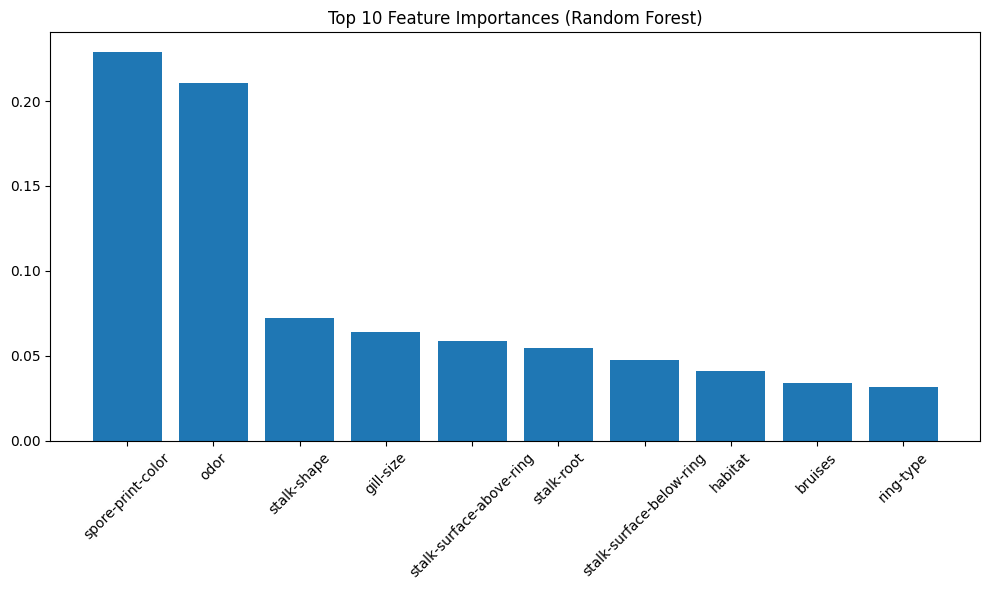

In [ ]:
import matplotlib.pyplot as plt

# Feature Importances
importances = rf_clf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()



### 5.1 XGBoost
Training and testing  the xgboost model

Cross-Validation Accuracy: 1.0000 ± 0.0000
Accuracy: 1.0000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       675
           1       1.00      1.00      1.00       454

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



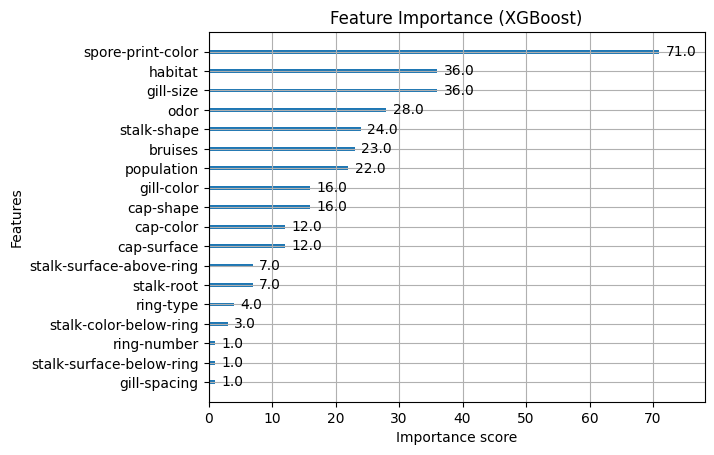

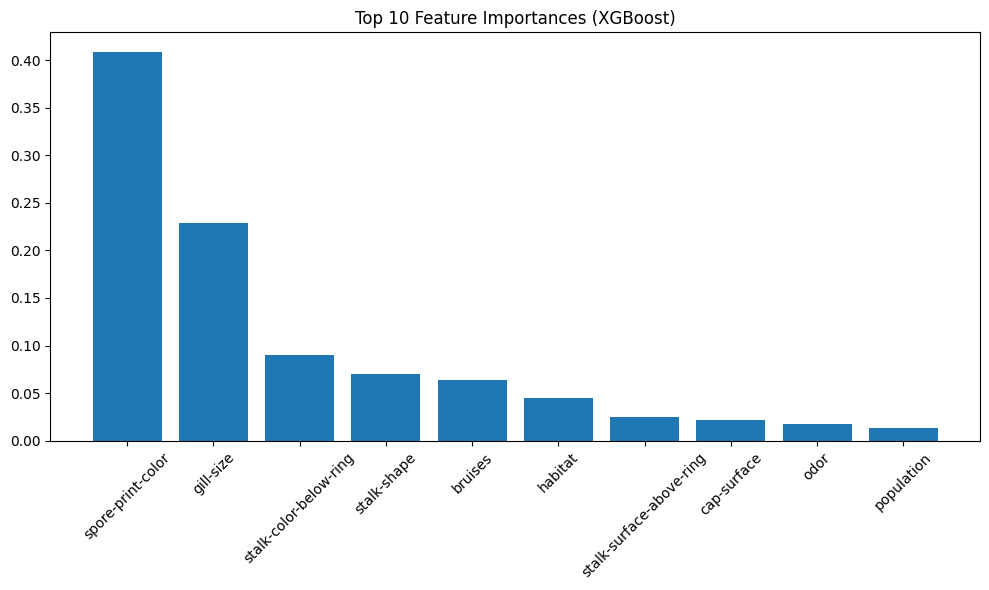

In [ ]:
from xgboost import XGBClassifier

# Modell initialisieren
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: %.4f ± %.4f" % (scores.mean(), scores.std()))

# Training
xgb_model.fit(X_train, y_train)

# Vorhersage auf Testdaten
y_pred_xgb = xgb_model.predict(X_test)

# Auswertung
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb))

# Feature Importance Plot
xgb.plot_importance(xgb_model)
plt.title("Feature Importance (XGBoost)")
plt.show()

importances = xgb_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (XGBoost)")
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()

### 5.2 Logistic Regression

### 5.3 Random Forest
has been selected as the third model. 

### 5.4 Model Performance Comparison

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: %.4f ± %.4f" % (scores.mean(), scores.std()))

### 5.5 (?) Error Analysis

The confusion matrix reveals that the Random Forest model achieves nearly perfect classification on the test set. Only very few misclassifications occur. Given the structure of the dataset (purely categorical, with some highly predictive features like `odor` and `spore-print-color`), this result is expected.

If a human were to classify mushrooms, they would likely rely on features like **odor, bruises, and gill characteristics**, which align with the model's most important features. Therefore, the model's decision process appears to be interpretable and biologically plausible.



# 6. Fine-tuning the model

General guidelines: 
1. Use as much data as possible for this step. 
2. As always automate what you can. 
3. Fine-tune the hyperparameters using cross-validation. 
4. Treat your data transformation choices as hyperparameters (e.g. replace missing values with zero or median? Or just drop the rows?). 
5. Unless there are very few hyperparamter values to explore, prefer random search over grid search. 
6. Try Ensemble methods. Combining your best models will often perform better than running them invdividually. 
7. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.
8. Don't tweak your model after measuring the generalization error: you would just start overfitting the test set

### 6.1 Fine-tuning XGBoost

In [ ]:
# Hyperparameteroptimierung überlegen

### 6.2 Fine-tuning Logistic Regression

### 6.3 Fine-tuning Random Forest

# 7. Present your solution

General guidelines: 
- Document what you have done. 
- Create a nice presentation: Make sure you highlight the big picture first. 
- Explain why your solution achieves the business objective. 
- Don't forget to present interesting points you noticed along the way. Describe what worked and what did not. List your assumptions and your system's limitations. 
- Ensure your key findings are communicated through beautiful visualizations or easy-toremember statements (e.g., "the median income is the number-one predictor of housing prices").

# 8. Launch, monitor and maintain

General guidelines: 
- Get your solution ready for production (plug into production data inputs, write unit tests, etc.). 
- Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops. Beware of slow degradation too: models tend to degrade as data evolves. Measuring performance may require a human pipeline (e.g., via a crowdsourcing service). Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values). This is particulary important for online learning systems. 
- Retrain your models on a regular basis on fresh data (automate as much as possible).

# 9. Bonus: Analyzing the Influence of Top-Features and Encoder

### 9.1 Influence of Top-Features on Model Performance

### 9.2 Influence of Encoder Selection on Model Performance